# <font color='#3e9dbf'>Import Lib and Data</font>

In [4416]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler


In [4417]:
data_training = pd.read_csv("./data/datatraining.txt")
data_test_1 = pd.read_csv("./data/datatest.txt")
data_test_2 = pd.read_csv("./data/datatest2.txt")

# <font color='#3e9dbf'>Function and config</font>

## <font color='#e89c9a'><ul><li>Show Statistical values</li></ul></font>

In [4418]:
def showStatistics(attr_name, places=2):
  
  table = []

  Mean = ['Mean']
  Median = ['Median']
  Mode = ['Mode']
  SD = ['SD']
  Variance = ['Variance']
  Min = ['Min']
  Q1 = ['Q₁']
  Q2 = ['Q₂']
  Q3 = ['Q₃']
  Max = ['Max']
  Skewness = ['Skewness']

  for data in [data_training, data_test_1, data_test_2]:
    Mean.append(round(data[attr_name].mean(), places))
    Median.append(round(data[attr_name].median(), places))
    Mode.append(round(data[attr_name].mode().values[0], places))
    SD.append(round(data[attr_name].std(), places))
    Variance.append(round(data[attr_name].var(), places))
    Min.append(round(data[attr_name].min(), places))
    Q1.append(round(data[attr_name].quantile(0.25), places))
    Q2.append(round(data[attr_name].quantile(0.5), places))
    Q3.append(round(data[attr_name].quantile(0.75), places))
    Max.append(round(data[attr_name].max(), places))
    Skewness.append(round(data[attr_name].skew(), places))

  table.append(Mean)
  table.append(Median)
  table.append(Mode)
  table.append(SD)
  table.append(Variance)
  table.append(Min)
  table.append(Q1)
  table.append(Q2)
  table.append(Q3)
  table.append(Max)
  table.append(Skewness)

  print(tabulate(table, headers=['', 'Data Training', 'Data Test 1', 'Data Test 2'], tablefmt='grid'))

## <font color='#e89c9a'><ul><li>Plot Histograms</li></ul></font>

In [4419]:
def plot_histogram(data, title, attr_name, ticks_size=18):
  skewness = round(data[attr_name].skew(), 4)
  data[attr_name].hist(bins=10, color='#006dad').set_facecolor("none")
  # plt.title(title)
  plt.xlabel(attr_name, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.legend([f'Skew: {skewness}'], frameon=False, fontsize=14)

  ax = plt.gca()
  ax.spines['top'].set_color('#545454')
  ax.spines['right'].set_color('#545454')
  ax.spines['left'].set_color('#545454')
  ax.spines['bottom'].set_color('#545454')
  ax.tick_params(axis='both', colors='#545454')

  plt.gca().tick_params(axis='both', colors='#545454')
  plt.tight_layout()
  plt.gcf().set_facecolor("none")
  plt.xticks(fontsize=ticks_size)
  plt.yticks(fontsize=ticks_size)
  plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
  plt.show()

## <font color='#e89c9a'><ul><li>Plot Histograms With KDE</li></ul></font>

In [4420]:
def plot_hist_kde(data, title, attr_name, ticks_size=18):
  occupied = data[data['Occupancy'] == 1][attr_name]
  unoccupied = data[data['Occupancy'] == 0][attr_name]

  plt.figure(figsize=(7, 5))
  sns.histplot(occupied, color='#006dad', label='Occupied', kde=True)
  sns.histplot(unoccupied, color='#ad4000', label='Unoccupied', kde=True)
  
  # plt.title(title)
  plt.xlabel(attr_name, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)

  plt.legend(frameon=False, fontsize=16)
  plt.gca().set_facecolor("none")
  plt.gcf().set_facecolor("none")
  plt.xticks(fontsize=ticks_size)
  plt.yticks(fontsize=ticks_size)
  plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
  plt.show()

## <font color='#e89c9a'><ul><li>Plot Comparison Boxplot</li></ul></font>

In [4421]:
def plot_comparison_boxplot(data, attr_name, dataset, ticks_size=18):
  
  title = ' '.join([word.capitalize() for word in attr_name.split()])
  palette = {0: '#ad4000', 1: '#006dad'}

  plt.figure(figsize=(7, 5))
  sns.boxplot(x='Occupancy', y=attr_name, hue='Occupancy', data=data, palette=palette, dodge=False, legend=False).set_facecolor("none")
  # plt.title(f'{title} comparison by Occupancy of {dataset} dataset')
  plt.xlabel('Occupancy', fontsize=14)
  plt.xticks([0, 1], ['Unoccupied', 'Occupied'])
  plt.ylabel(title, fontsize=14)
  plt.gca()
  plt.gcf().set_facecolor("none")
  plt.xticks(fontsize=ticks_size)
  plt.yticks(fontsize=ticks_size)
  plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
  plt.show()

  stats_list = []

  for class_name, group in data.groupby('Occupancy'):
    stats = {
      'Class': 'Unoccupied' if class_name == 0 else 'Occupancy',
      'Q₁': round(group[attr_name].quantile(.25), 5),
      'Q₃': round(group[attr_name].quantile(.75), 5),
    }
    stats_list.append(stats)

  # Example usage
  stats_df = pd.DataFrame(stats_list)
  print(tabulate(stats_df, headers='keys', tablefmt='grid'))


## <font color='#e89c9a'><ul><li>Plot Pair plot</li></ul></font>

In [4422]:
def save_pair_plot(data, font_size=12):
  return
  pair_plot = sns.pairplot(data, height=3, diag_kind='kde', hue='Occupancy')

  # Set background color to none for all elements
  for ax in pair_plot.axes.flatten():
    ax.set_facecolor("none")
    ax.set_title(ax.get_title(), fontsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
      label.set_fontsize(font_size)


## <font color='#e89c9a'><ul><li>Plot Heatmap</li></ul></font>

In [4423]:
def plot_correlation_heatmap(data, title):
  plt.figure(figsize=(12, 10))
  correlation_matrix = data.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 18, "weight": "bold"})
  # plt.title(title)
  plt.gca().set_facecolor("none")
  plt.gcf().set_facecolor("none")
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=16, rotation=0, wrap=True)
  plt.show()

# <font color='#3e9dbf'>Dataset Info</font>

## <font color='#e89c9a'><ul><li>Data Training</li></ul></font>

In [4424]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8143 non-null   int64  
 1   date            8143 non-null   object 
 2   Temperature     8143 non-null   float64
 3   Humidity        8143 non-null   float64
 4   Light           8143 non-null   float64
 5   CO2             8143 non-null   float64
 6   Humidity Ratio  8143 non-null   float64
 7   Occupancy       8143 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 509.1+ KB


In [4425]:
data_training.head(8143)

,id,date,Temperature,Humidity,Light,CO2,Humidity Ratio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...,...
8138,8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


## <font color='#e89c9a'><ul><li>Data Test 1</li></ul></font>

In [4426]:
data_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2665 non-null   int64  
 1   date            2665 non-null   object 
 2   Temperature     2665 non-null   float64
 3   Humidity        2665 non-null   float64
 4   Light           2665 non-null   float64
 5   CO2             2665 non-null   float64
 6   Humidity Ratio  2665 non-null   float64
 7   Occupancy       2665 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 166.7+ KB


In [4427]:
data_test_1.head(2665)

,id,date,Temperature,Humidity,Light,CO2,Humidity Ratio,Occupancy
0,140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...,...
2660,2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


## <font color='#e89c9a'><ul><li>Data Test 2</li></ul></font>

In [4428]:
data_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9752 non-null   int64  
 1   date            9752 non-null   object 
 2   Temperature     9752 non-null   float64
 3   Humidity        9752 non-null   float64
 4   Light           9752 non-null   float64
 5   CO2             9752 non-null   float64
 6   Humidity Ratio  9752 non-null   float64
 7   Occupancy       9752 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 609.6+ KB


In [4429]:
data_test_2.head(9752)

,id,date,Temperature,Humidity,Light,CO2,Humidity Ratio,Occupancy
0,1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...,...
9747,9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


# <font color='#3e9dbf'>Feature</font>

## <font color='#e89c9a'><ul><li>Occupancy</li></ul></font>

In [4430]:
attr_name = 'Occupancy'

data_training[attr_name] = data_training[attr_name].astype(bool)
data_test_1[attr_name] = data_test_1[attr_name].astype(bool)
data_test_2[attr_name] = data_test_2[attr_name].astype(bool)

table = []

table.append(['Data Training', data_training[attr_name].value_counts().iloc[0], data_training[attr_name].value_counts().iloc[1]])
table.append(['Data Test 1', data_test_1[attr_name].value_counts().iloc[0], data_test_1[attr_name].value_counts().iloc[1]])
table.append(['Data Test 2', data_test_2[attr_name].value_counts().iloc[0], data_test_2[attr_name].value_counts().iloc[1]])

print(tabulate(table, headers=['', 'Unoccupied', 'Occupied'], tablefmt='grid'))

data_training[attr_name] = data_training[attr_name].astype(int)
data_test_1[attr_name] = data_test_1[attr_name].astype(int)
data_test_2[attr_name] = data_test_2[attr_name].astype(int)

+---------------+--------------+------------+
|               |   Unoccupied |   Occupied |
+===============+==============+============+
| Data Training |         6414 |       1729 |
+---------------+--------------+------------+
| Data Test 1   |         1693 |        972 |
+---------------+--------------+------------+
| Data Test 2   |         7703 |       2049 |
+---------------+--------------+------------+


## <font color='#e89c9a'><ul><li>Temperature</li></ul></font>

In [4431]:
attr_name = 'Temperature'

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Statistical values</li></ul></font>

In [4432]:
showStatistics(attr_name)

+----------+-----------------+---------------+---------------+
|          |   Data Training |   Data Test 1 |   Data Test 2 |
+==========+=================+===============+===============+
| Mean     |           20.62 |         21.43 |         21    |
+----------+-----------------+---------------+---------------+
| Median   |           20.39 |         20.89 |         20.79 |
+----------+-----------------+---------------+---------------+
| Mode     |           19.39 |         20.7  |         20.39 |
+----------+-----------------+---------------+---------------+
| SD       |            1.02 |          1.03 |          1.02 |
+----------+-----------------+---------------+---------------+
| Variance |            1.03 |          1.06 |          1.04 |
+----------+-----------------+---------------+---------------+
| Min      |           19    |         20.2  |         19.5  |
+----------+-----------------+---------------+---------------+
| Q₁       |           19.7  |         20.65 |         

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Training</li></ul></font>

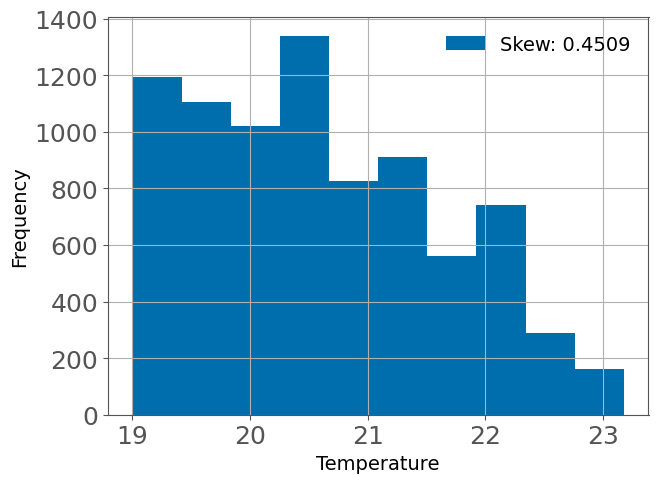

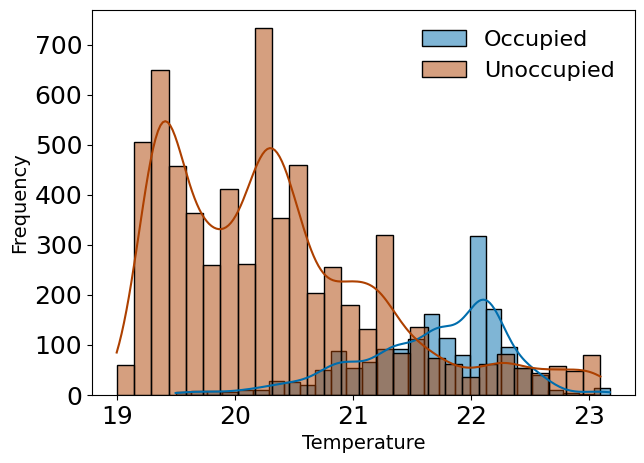

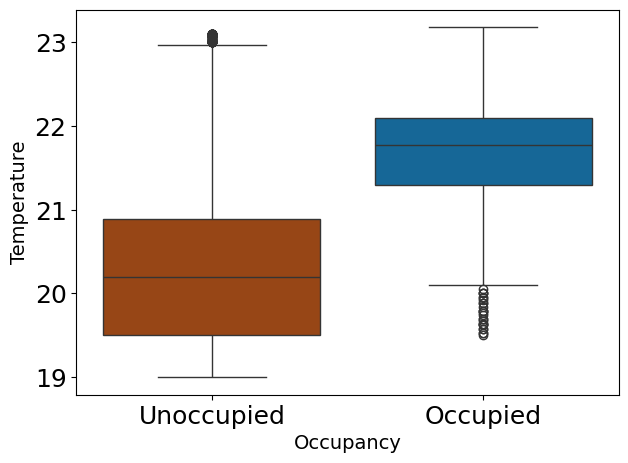

+----+------------+-------+-------+
|    | Class      |    Q₁ |    Q₃ |
+====+============+=======+=======+
|  0 | Unoccupied | 19.5  | 20.89 |
+----+------------+-------+-------+
|  1 | Occupancy  | 21.29 | 22.1  |
+----+------------+-------+-------+


In [4433]:
plot_histogram(data_training, 'Data Training', attr_name)
plot_hist_kde(data_training, 'Data Training', attr_name)
plot_comparison_boxplot(data_training, attr_name, 'Training')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 1</li></ul></font>

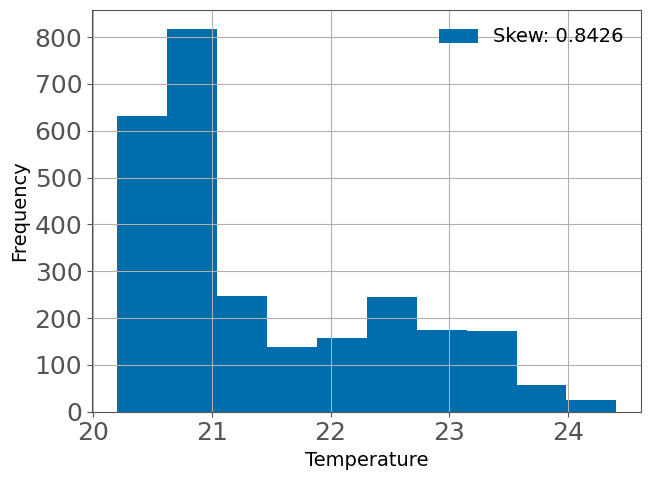

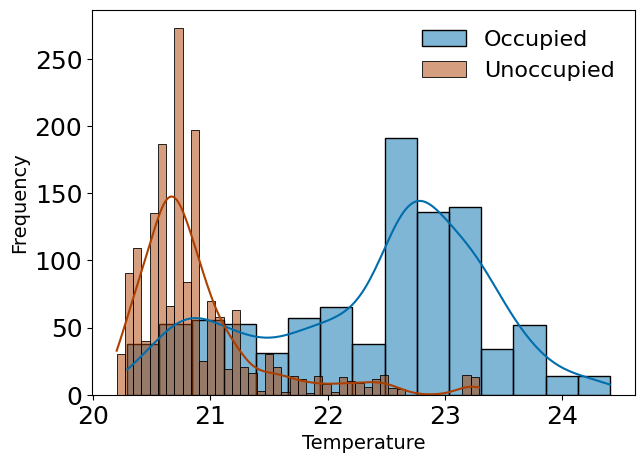

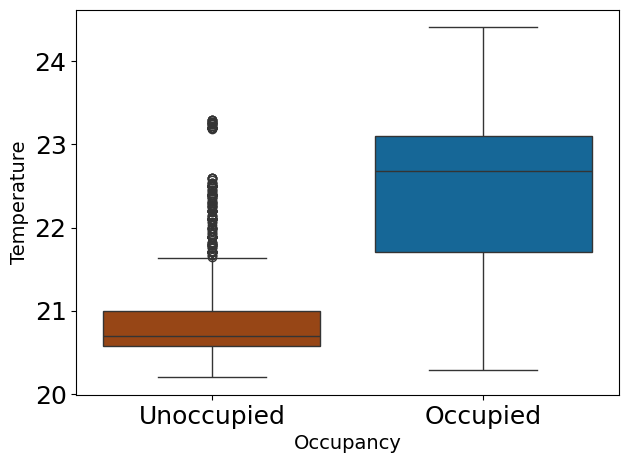

+----+------------+--------+------+
|    | Class      |     Q₁ |   Q₃ |
+====+============+========+======+
|  0 | Unoccupied | 20.575 | 21   |
+----+------------+--------+------+
|  1 | Occupancy  | 21.7   | 23.1 |
+----+------------+--------+------+


In [4434]:
plot_histogram(data_test_1, 'Data Training', attr_name)
plot_hist_kde(data_test_1, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_1, attr_name, 'Test 1')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 2</li></ul></font>

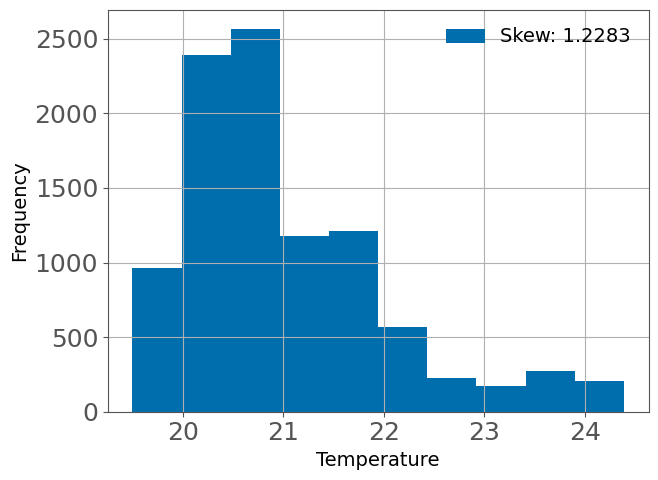

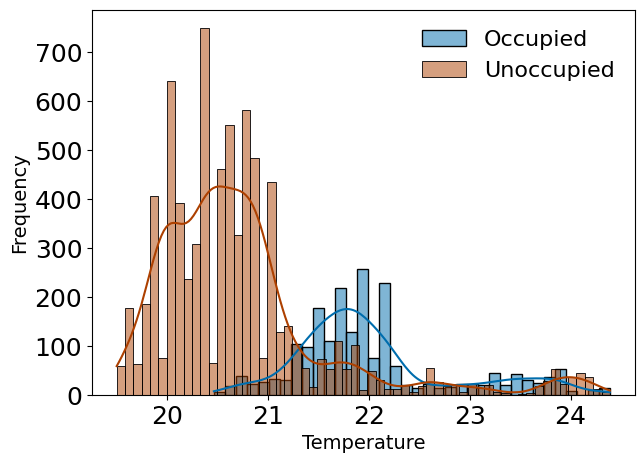

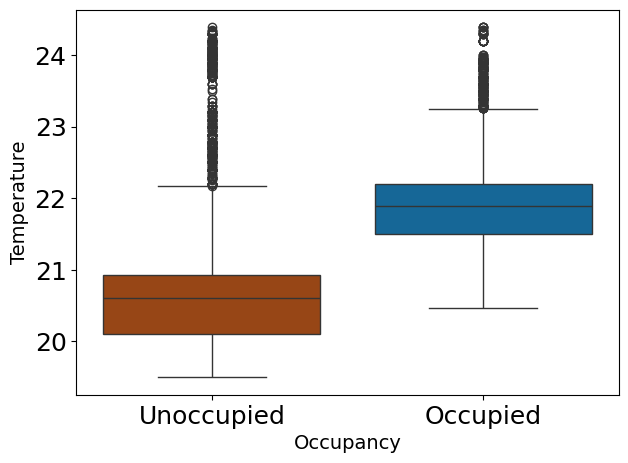

+----+------------+------+---------+
|    | Class      |   Q₁ |      Q₃ |
+====+============+======+=========+
|  0 | Unoccupied | 20.1 | 20.9267 |
+----+------------+------+---------+
|  1 | Occupancy  | 21.5 | 22.2    |
+----+------------+------+---------+


In [4435]:
plot_histogram(data_test_2, 'Data Training', attr_name)
plot_hist_kde(data_test_2, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_2, attr_name, 'Test 2')

## <font color='#e89c9a'><ul><li>Humidity</li></ul></font>

In [4436]:
attr_name = 'Humidity'

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Statistical values</li></ul></font>

In [4437]:
showStatistics(attr_name)

+----------+-----------------+---------------+---------------+
|          |   Data Training |   Data Test 1 |   Data Test 2 |
+==========+=================+===============+===============+
| Mean     |           25.73 |         25.35 |         29.89 |
+----------+-----------------+---------------+---------------+
| Median   |           26.22 |         25    |         30.2  |
+----------+-----------------+---------------+---------------+
| Mode     |           33    |         22.5  |         30.39 |
+----------+-----------------+---------------+---------------+
| SD       |            5.53 |          2.44 |          3.95 |
+----------+-----------------+---------------+---------------+
| Variance |           30.59 |          5.94 |         15.62 |
+----------+-----------------+---------------+---------------+
| Min      |           16.74 |         22.1  |         21.86 |
+----------+-----------------+---------------+---------------+
| Q₁       |           20.2  |         23.26 |         

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Training</li></ul></font>

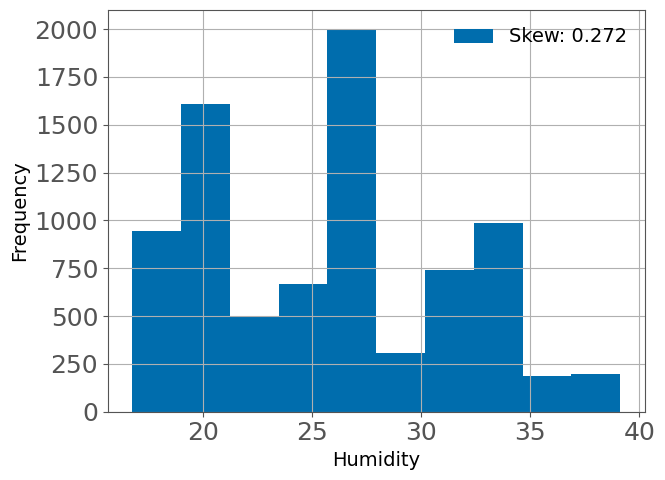

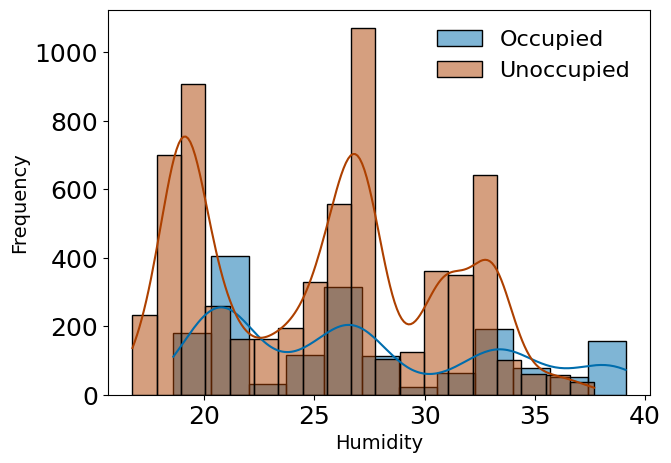

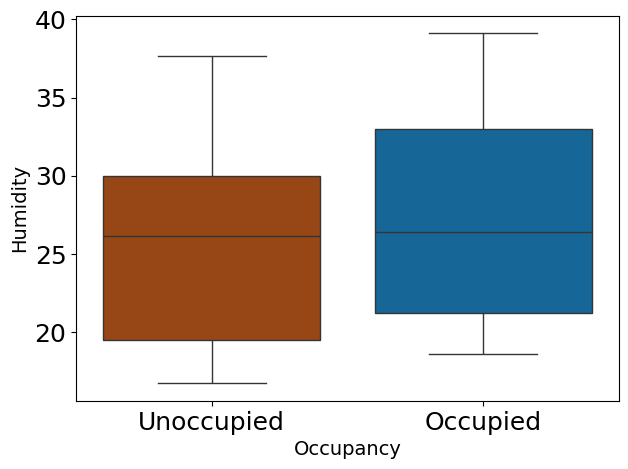

+----+------------+--------+--------+
|    | Class      |     Q₁ |     Q₃ |
+====+============+========+========+
|  0 | Unoccupied | 19.5   | 30     |
+----+------------+--------+--------+
|  1 | Occupancy  | 21.236 | 32.975 |
+----+------------+--------+--------+


In [4438]:
plot_histogram(data_training, 'Data Training', attr_name)
plot_hist_kde(data_training, 'Data Training', attr_name)
plot_comparison_boxplot(data_training, attr_name, 'Training')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 1</li></ul></font>

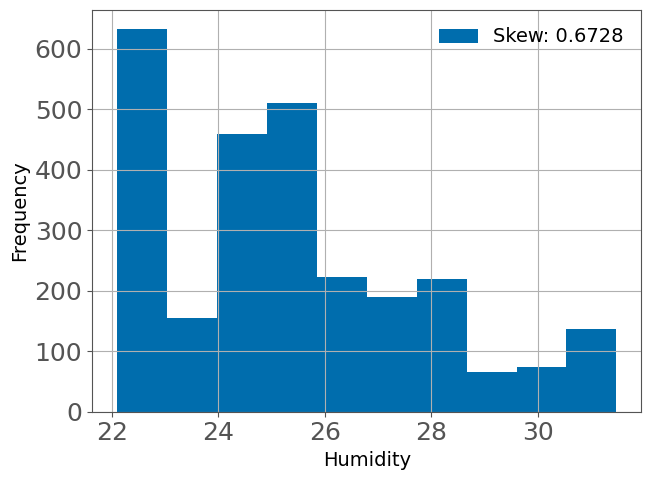

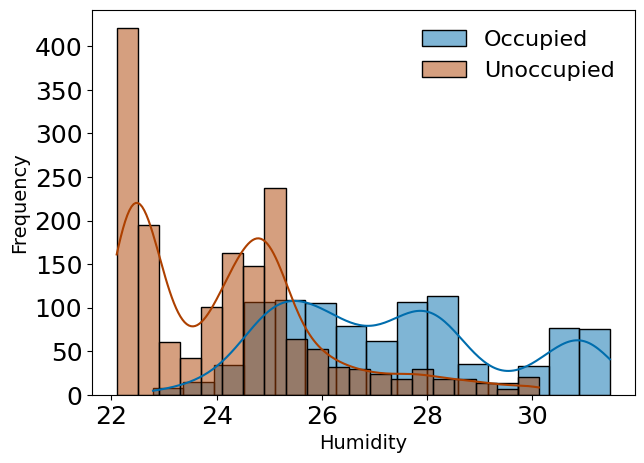

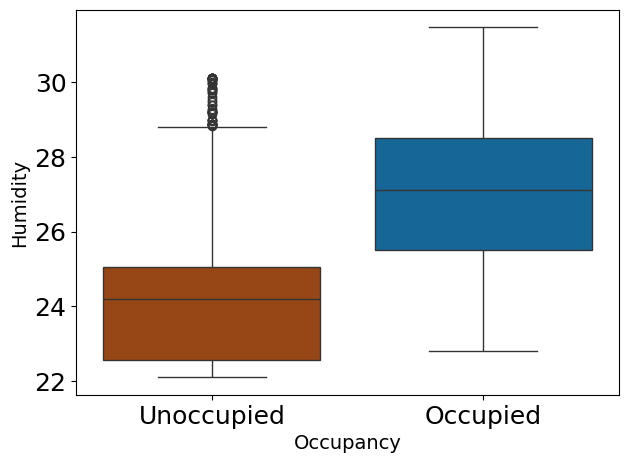

+----+------------+-------+-------+
|    | Class      |    Q₁ |    Q₃ |
+====+============+=======+=======+
|  0 | Unoccupied | 22.55 | 25.05 |
+----+------------+-------+-------+
|  1 | Occupancy  | 25.5  | 28.5  |
+----+------------+-------+-------+


In [4439]:
plot_histogram(data_test_1, 'Data Training', attr_name)
plot_hist_kde(data_test_1, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_1, attr_name, 'Test 1')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 2</li></ul></font>

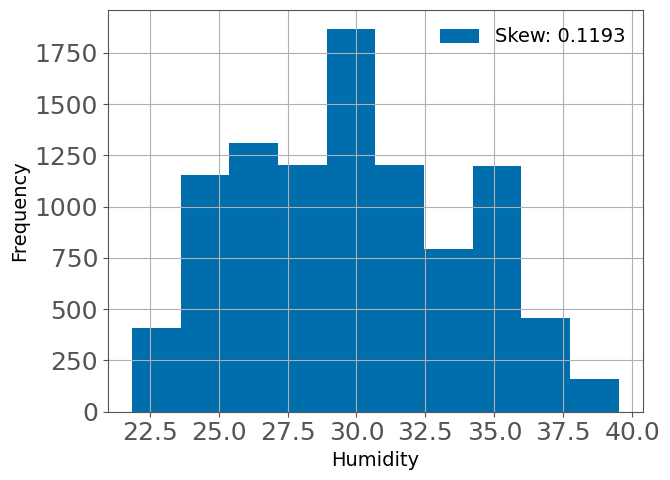

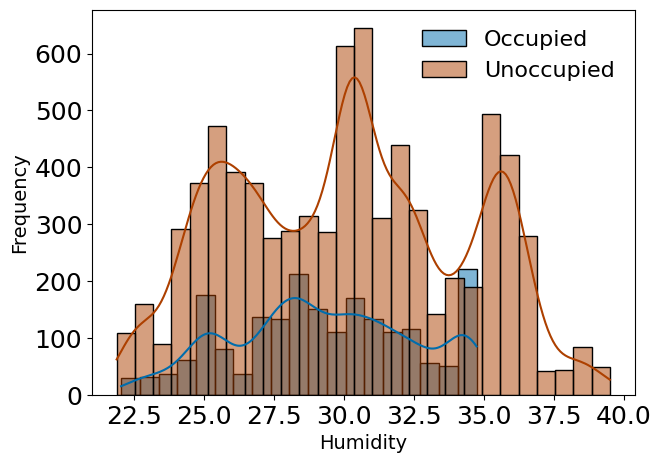

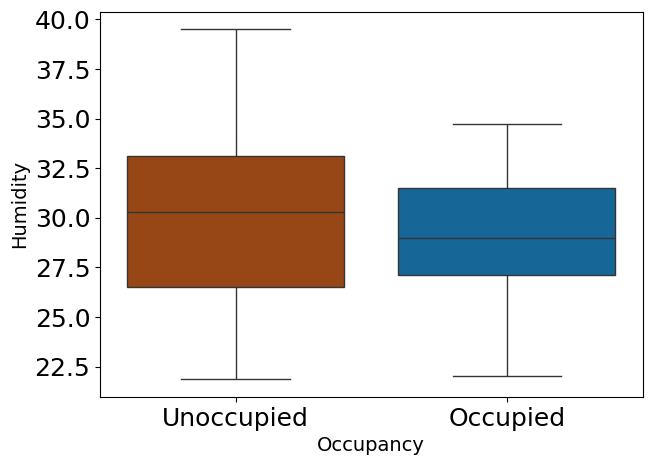

+----+------------+------+-------+
|    | Class      |   Q₁ |    Q₃ |
+====+============+======+=======+
|  0 | Unoccupied | 26.5 | 33.09 |
+----+------------+------+-------+
|  1 | Occupancy  | 27.1 | 31.5  |
+----+------------+------+-------+


In [4440]:
plot_histogram(data_test_2, 'Data Training', attr_name)
plot_hist_kde(data_test_2, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_2, attr_name, 'Test 2')

## <font color='#e89c9a'><ul><li>Light</li></ul></font>

In [4441]:
attr_name = 'Light'

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Statistical values</li></ul></font>

In [4442]:
showStatistics(attr_name)

+----------+-----------------+---------------+---------------+
|          |   Data Training |   Data Test 1 |   Data Test 2 |
+==========+=================+===============+===============+
| Mean     |          119.52 |        193.23 |        123.07 |
+----------+-----------------+---------------+---------------+
| Median   |            0    |          0    |          0    |
+----------+-----------------+---------------+---------------+
| Mode     |            0    |          0    |          0    |
+----------+-----------------+---------------+---------------+
| SD       |          194.76 |        250.21 |        208.22 |
+----------+-----------------+---------------+---------------+
| Variance |        37929.8  |      62605.5  |      43356.1  |
+----------+-----------------+---------------+---------------+
| Min      |            0    |          0    |          0    |
+----------+-----------------+---------------+---------------+
| Q₁       |            0    |          0    |         

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Training</li></ul></font>

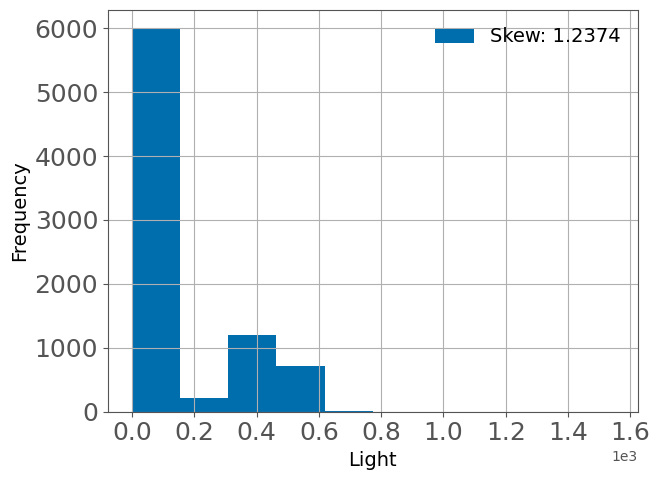

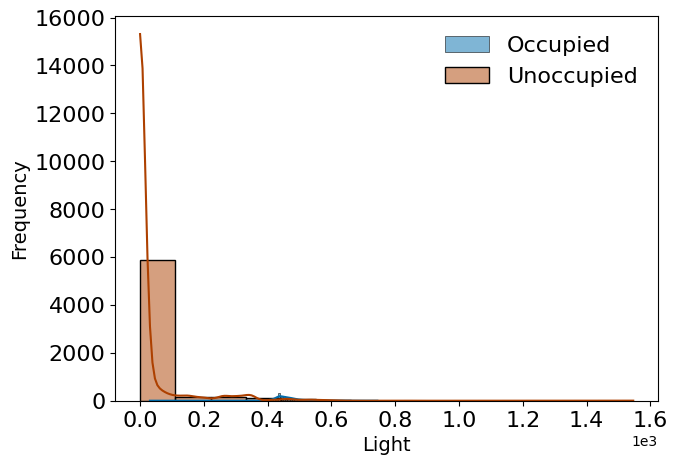

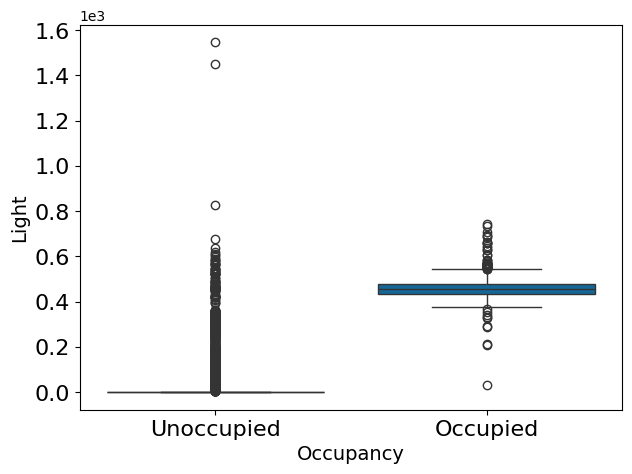

+----+------------+------+--------+
|    | Class      |   Q₁ |     Q₃ |
+====+============+======+========+
|  0 | Unoccupied |    0 |   0    |
+----+------------+------+--------+
|  1 | Occupancy  |  433 | 477.75 |
+----+------------+------+--------+


In [4443]:
plot_histogram(data_training, 'Data Training', attr_name)
plot_hist_kde(data_training, 'Data Training', attr_name, 16)
plot_comparison_boxplot(data_training, attr_name, 'Training', 16)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 1</li></ul></font>

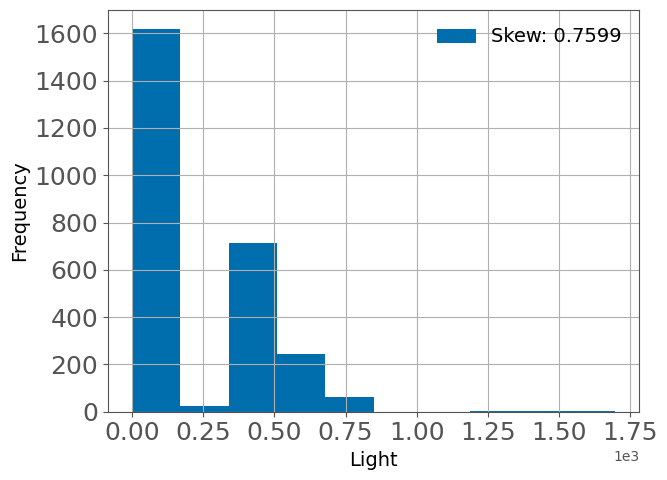

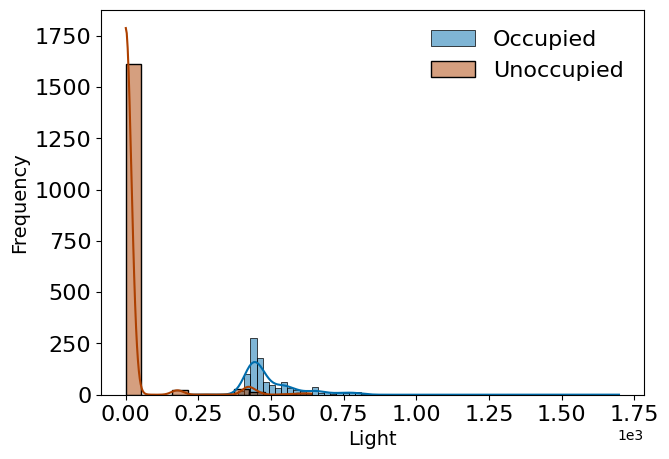

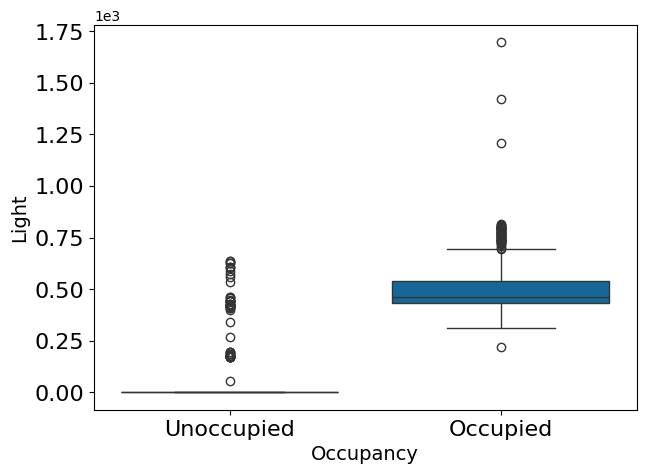

+----+------------+------+------+
|    | Class      |   Q₁ |   Q₃ |
+====+============+======+======+
|  0 | Unoccupied |    0 |    0 |
+----+------------+------+------+
|  1 | Occupancy  |  433 |  538 |
+----+------------+------+------+


In [4444]:
plot_histogram(data_test_1, 'Data Training', attr_name)
plot_hist_kde(data_test_1, 'Data Training', attr_name, 16)
plot_comparison_boxplot(data_test_1, attr_name, 'Test 1', 16)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 2</li></ul></font>

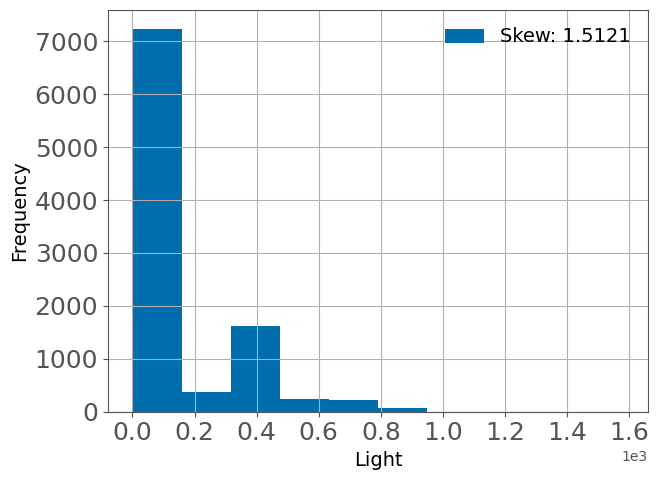

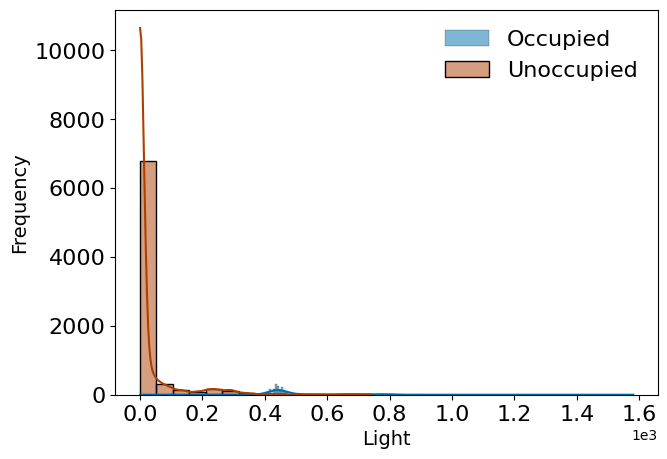

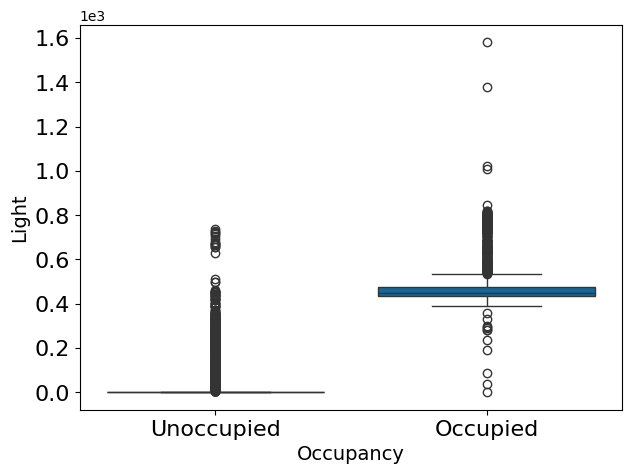

+----+------------+------+------+
|    | Class      |   Q₁ |   Q₃ |
+====+============+======+======+
|  0 | Unoccupied |    0 |    0 |
+----+------------+------+------+
|  1 | Occupancy  |  433 |  474 |
+----+------------+------+------+


In [4445]:
plot_histogram(data_test_2, 'Data Training', attr_name)
plot_hist_kde(data_test_2, 'Data Training', attr_name, 16)
plot_comparison_boxplot(data_test_2, attr_name, 'Test 2', 16)

## <font color='#e89c9a'><ul><li>CO2</li></ul></font>

In [4446]:
attr_name = 'CO2'

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Statistical values</li></ul></font>

In [4447]:
showStatistics(attr_name)

+----------+-----------------+---------------+---------------+
|          |   Data Training |   Data Test 1 |   Data Test 2 |
+==========+=================+===============+===============+
| Mean     |          606.55 |        717.91 |        753.22 |
+----------+-----------------+---------------+---------------+
| Median   |          453.5  |        580.5  |        639    |
+----------+-----------------+---------------+---------------+
| Mode     |          439    |        436    |        503    |
+----------+-----------------+---------------+---------------+
| SD       |          314.32 |        292.68 |        297.1  |
+----------+-----------------+---------------+---------------+
| Variance |        98797.6  |      85662.6  |      88266.1  |
+----------+-----------------+---------------+---------------+
| Min      |          412.75 |        427.5  |        484.67 |
+----------+-----------------+---------------+---------------+
| Q₁       |          439    |        466    |        5

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Training</li></ul></font>

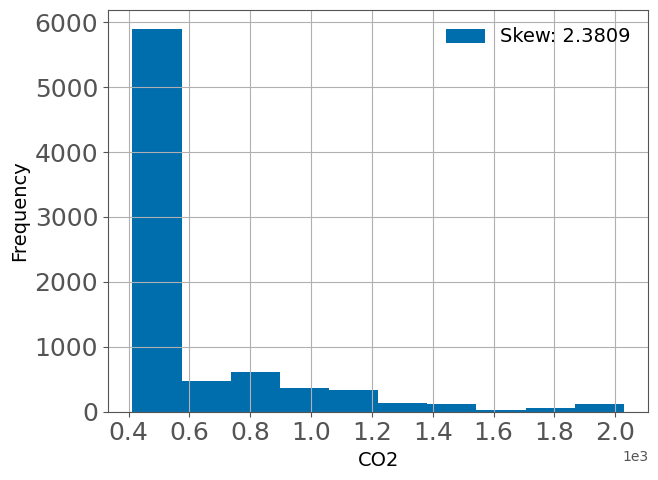

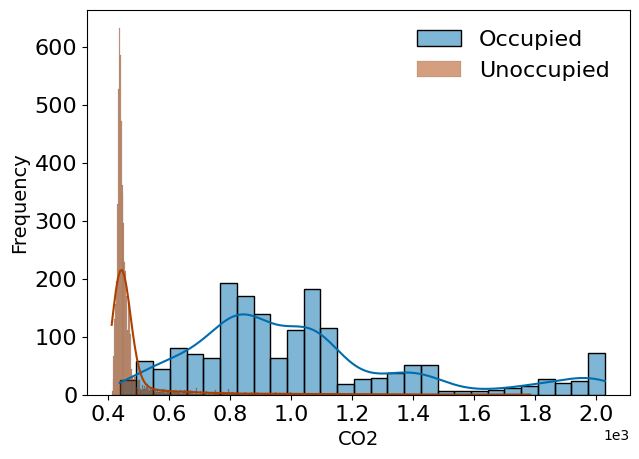

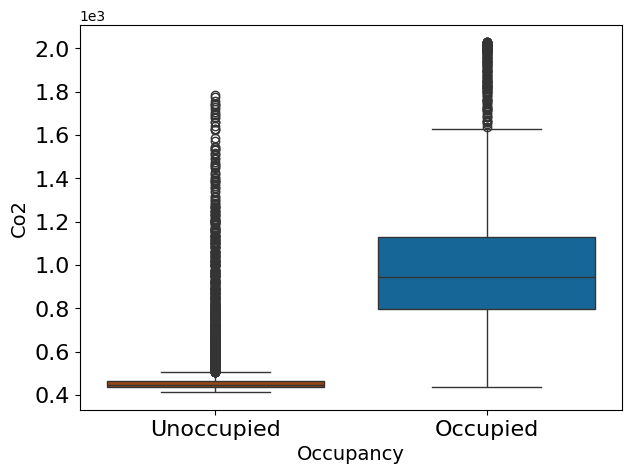

+----+------------+------+---------+
|    | Class      |   Q₁ |      Q₃ |
+====+============+======+=========+
|  0 | Unoccupied |  437 |  464.5  |
+----+------------+------+---------+
|  1 | Occupancy  |  796 | 1131.25 |
+----+------------+------+---------+


In [4448]:
plot_histogram(data_training, 'Data Training', attr_name)
plot_hist_kde(data_training, 'Data Training', attr_name, 16)
plot_comparison_boxplot(data_training, attr_name, 'Training', 16)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 1</li></ul></font>

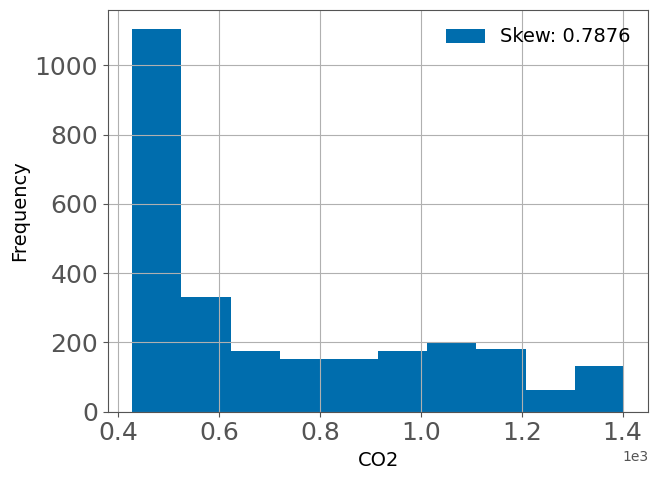

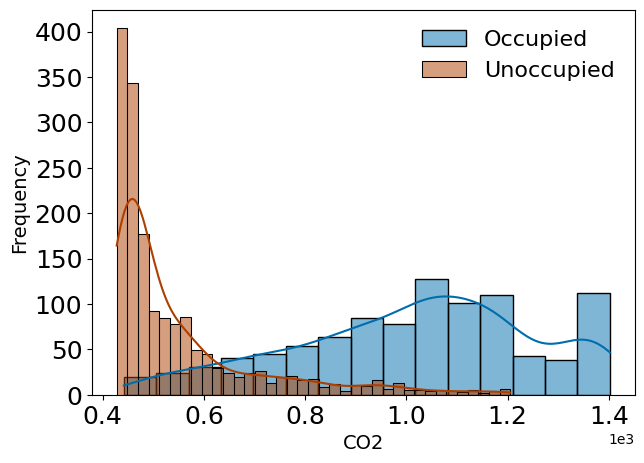

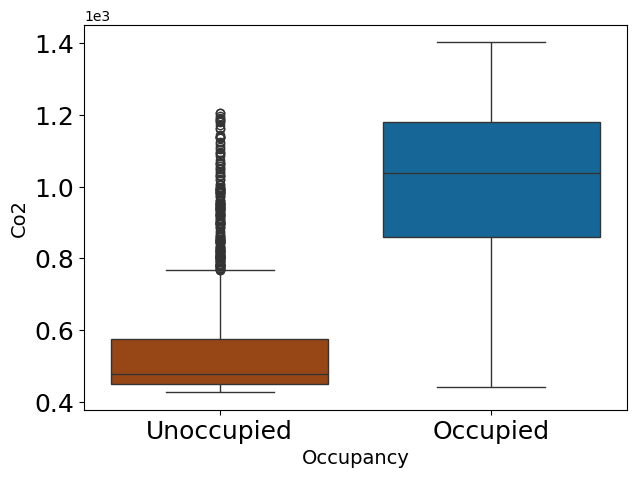

+----+------------+--------+---------+
|    | Class      |     Q₁ |      Q₃ |
+====+============+========+=========+
|  0 | Unoccupied | 449.75 |  576.5  |
+----+------------+--------+---------+
|  1 | Occupancy  | 860.2  | 1180.25 |
+----+------------+--------+---------+


In [4449]:
plot_histogram(data_test_1, 'Data Training', attr_name)
plot_hist_kde(data_test_1, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_1, attr_name, 'Test 1')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 2</li></ul></font>

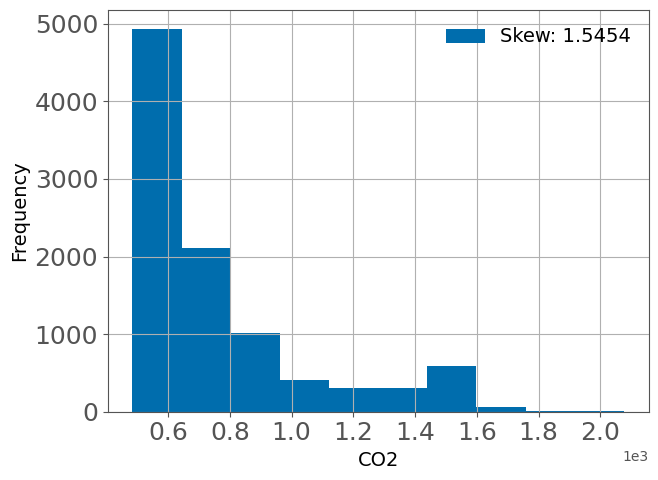

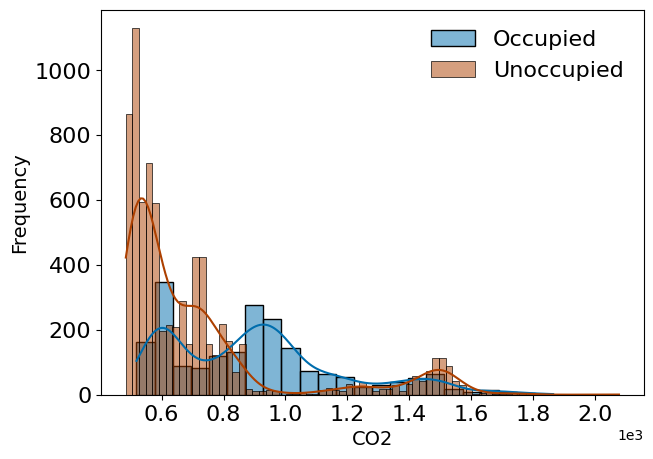

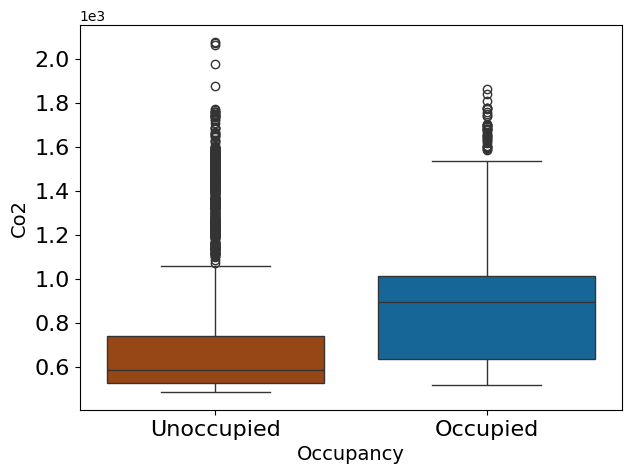

+----+------------+-------+--------+
|    | Class      |    Q₁ |     Q₃ |
+====+============+=======+========+
|  0 | Unoccupied | 524.5 |  739.5 |
+----+------------+-------+--------+
|  1 | Occupancy  | 637   | 1014.5 |
+----+------------+-------+--------+


In [4450]:
plot_histogram(data_test_2, 'Data Training', attr_name)
plot_hist_kde(data_test_2, 'Data Training', attr_name, 16)
plot_comparison_boxplot(data_test_2, attr_name, 'Test 2', 16)

## <font color='#e89c9a'><ul><li>Humidity Ratio</li></ul></font>

In [4451]:
attr_name = 'Humidity Ratio'

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Statistical values</li></ul></font>

In [4452]:
showStatistics(attr_name, 5)

+----------+-----------------+---------------+---------------+
|          |   Data Training |   Data Test 1 |   Data Test 2 |
+==========+=================+===============+===============+
| Mean     |         0.00386 |       0.00403 |       0.00459 |
+----------+-----------------+---------------+---------------+
| Median   |         0.0038  |       0.00382 |       0.00459 |
+----------+-----------------+---------------+---------------+
| Mode     |         0.00485 |       0.00333 |       0.00509 |
+----------+-----------------+---------------+---------------+
| SD       |         0.00085 |       0.00061 |       0.00053 |
+----------+-----------------+---------------+---------------+
| Variance |         0       |       0       |       0       |
+----------+-----------------+---------------+---------------+
| Min      |         0.00267 |       0.0033  |       0.00327 |
+----------+-----------------+---------------+---------------+
| Q₁       |         0.00308 |       0.00353 |       0.

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Training</li></ul></font>

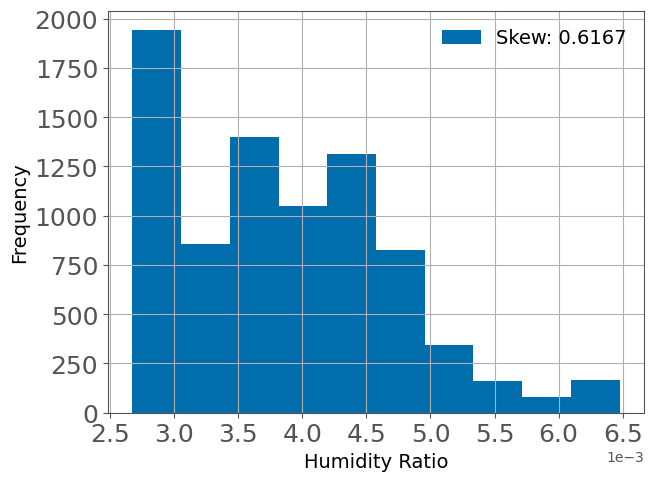

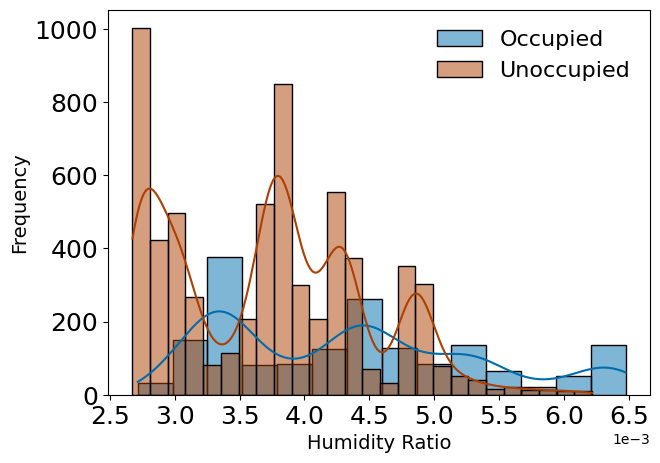

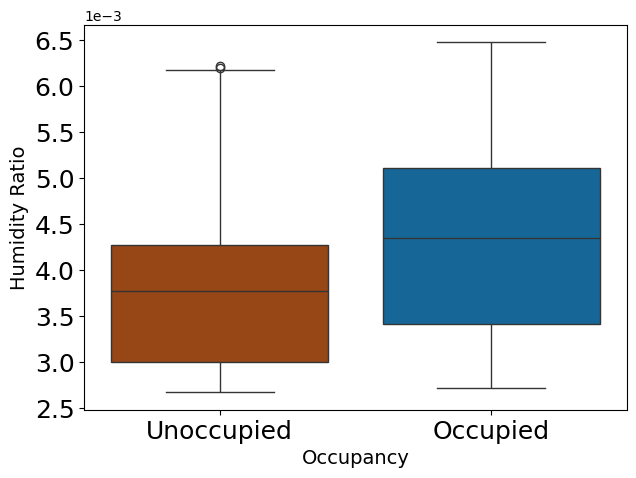

+----+------------+---------+---------+
|    | Class      |      Q₁ |      Q₃ |
+====+============+=========+=========+
|  0 | Unoccupied | 0.003   | 0.00427 |
+----+------------+---------+---------+
|  1 | Occupancy  | 0.00342 | 0.00511 |
+----+------------+---------+---------+


In [4453]:
plot_histogram(data_training, 'Data Training', attr_name)
plot_hist_kde(data_training, 'Data Training', attr_name)
plot_comparison_boxplot(data_training, attr_name, 'Training')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 1</li></ul></font>

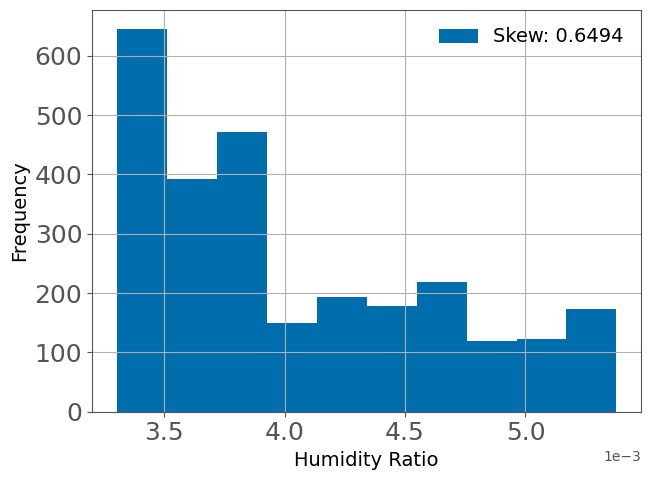

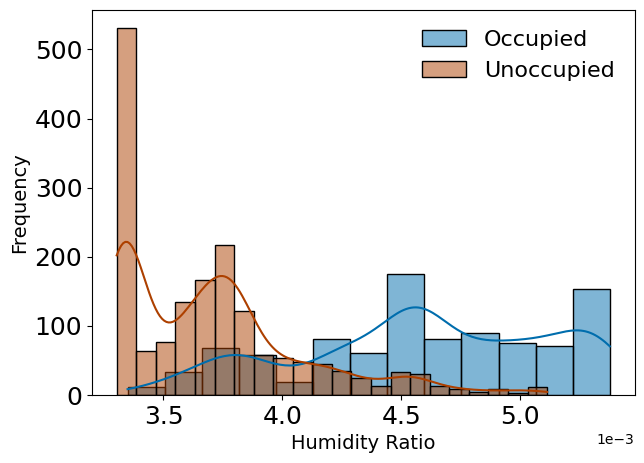

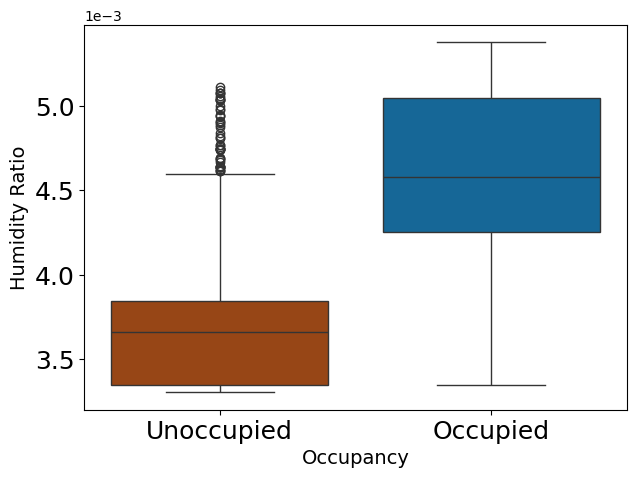

+----+------------+---------+---------+
|    | Class      |      Q₁ |      Q₃ |
+====+============+=========+=========+
|  0 | Unoccupied | 0.00335 | 0.00385 |
+----+------------+---------+---------+
|  1 | Occupancy  | 0.00425 | 0.00504 |
+----+------------+---------+---------+


In [4454]:
plot_histogram(data_test_1, 'Data Training', attr_name)
plot_hist_kde(data_test_1, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_1, attr_name, 'Test 1')

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Test 2</li></ul></font>

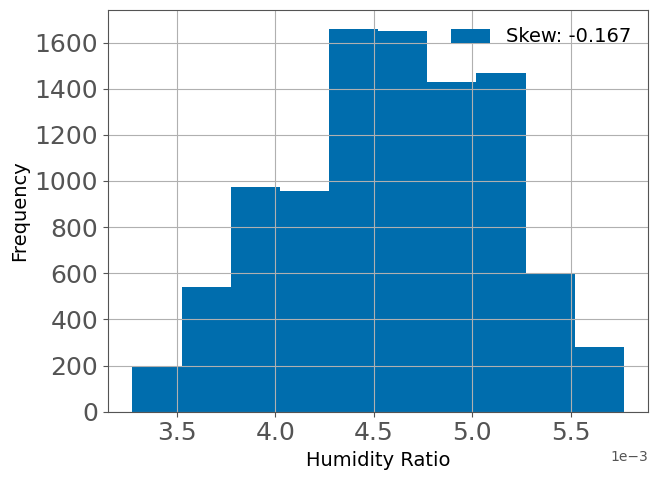

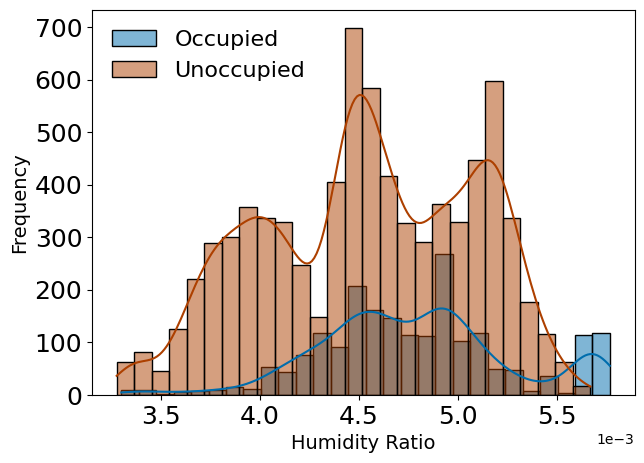

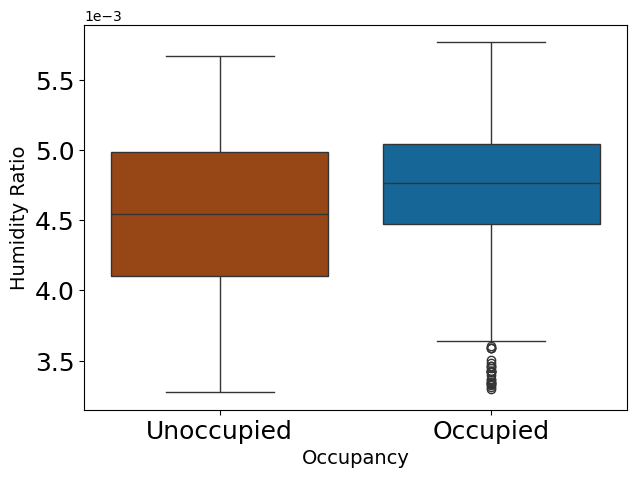

+----+------------+---------+---------+
|    | Class      |      Q₁ |      Q₃ |
+====+============+=========+=========+
|  0 | Unoccupied | 0.0041  | 0.00499 |
+----+------------+---------+---------+
|  1 | Occupancy  | 0.00447 | 0.00504 |
+----+------------+---------+---------+


In [4455]:
plot_histogram(data_test_2, 'Data Training', attr_name)
plot_hist_kde(data_test_2, 'Data Training', attr_name)
plot_comparison_boxplot(data_test_2, attr_name, 'Test 2')

# <font color='#3e9dbf'>Relation</font>

In [4456]:
new_data_training = data_training.copy()
new_data_test_1 = data_test_1.copy()
new_data_test_2 = data_test_2.copy()

new_data_training.drop(columns=['date'], inplace=True)
new_data_test_1.drop(columns=['date'], inplace=True)
new_data_test_2.drop(columns=['date'], inplace=True)

new_data_training.drop(columns=['id'], inplace=True)
new_data_test_1.drop(columns=['id'], inplace=True)
new_data_test_2.drop(columns=['id'], inplace=True)

## <font color='#e89c9a'><ul><li>Data Training</li></ul></font>

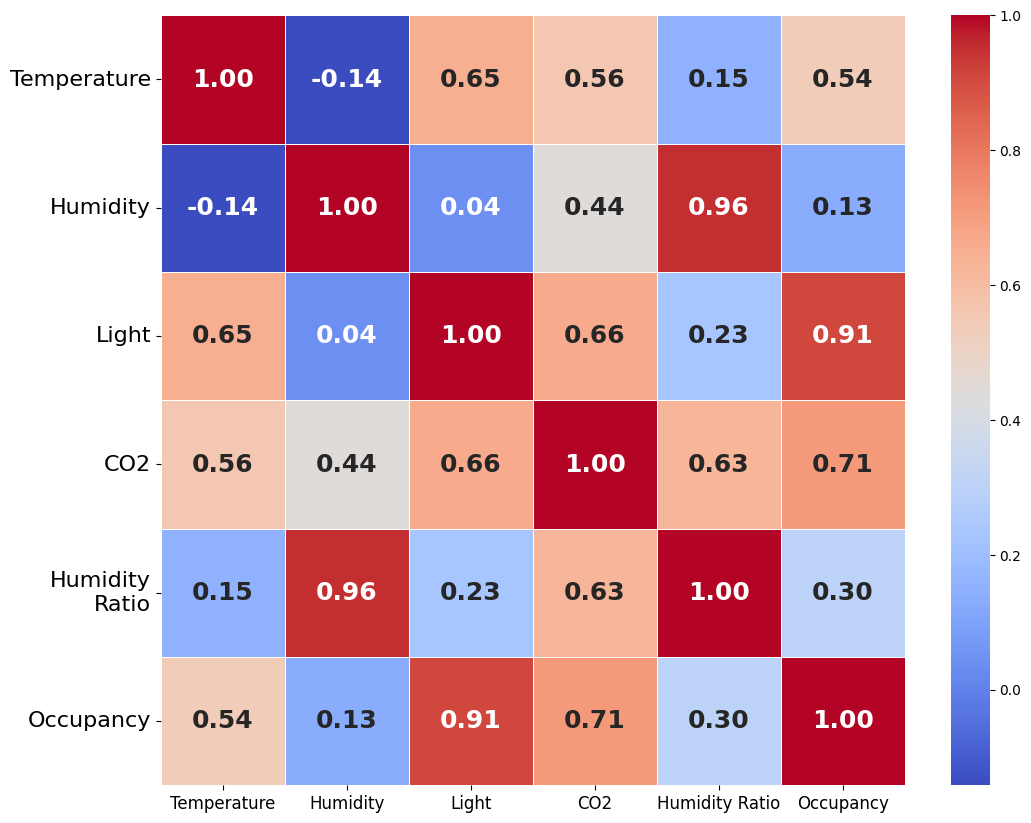

In [4457]:
save_pair_plot(new_data_training)
plot_correlation_heatmap(new_data_training, 'Data Training')

## <font color='#e89c9a'><ul><li>Data Test 1</li></ul></font>

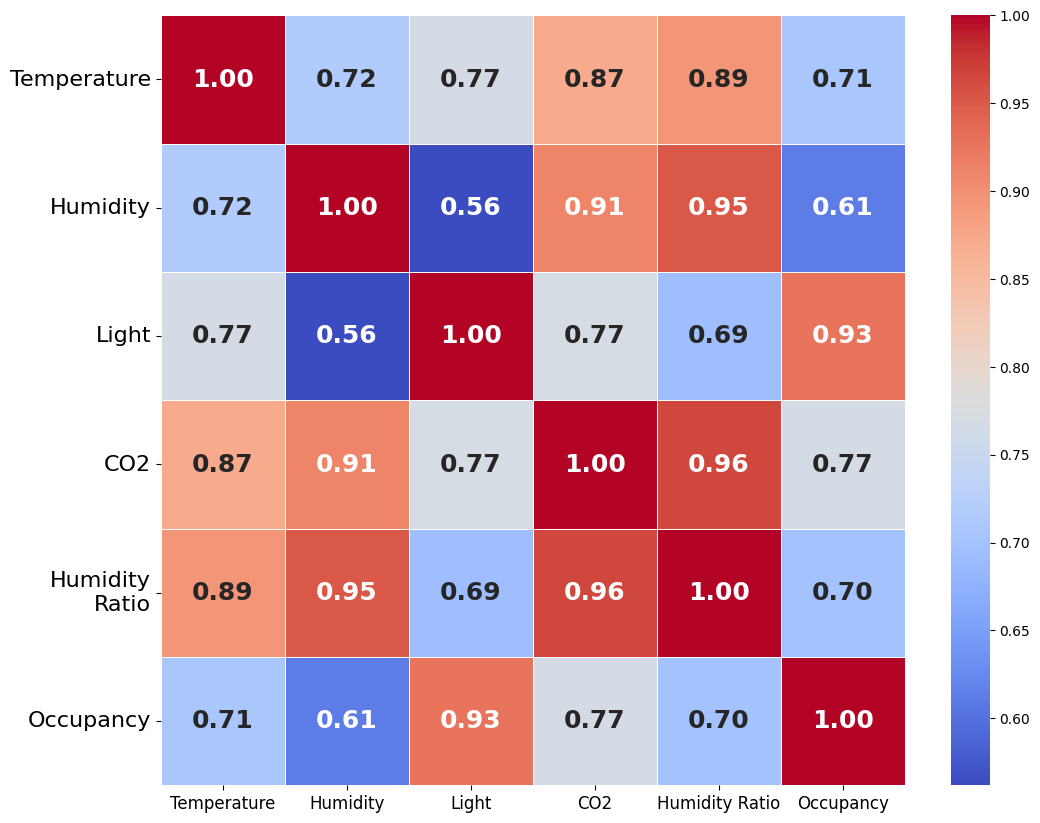

In [4458]:
save_pair_plot(new_data_test_1)
plot_correlation_heatmap(new_data_test_1, 'Data Test 1')

## <font color='#e89c9a'><ul><li>Data Test 2</li></ul></font>

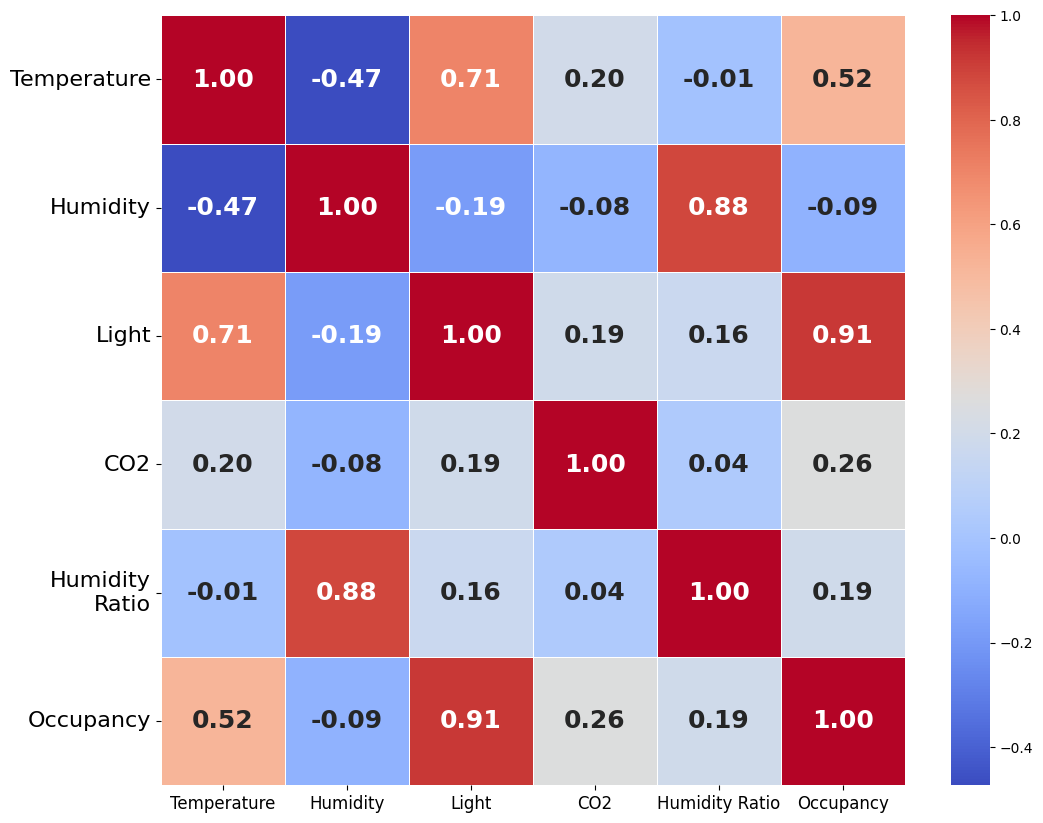

In [4459]:
save_pair_plot(new_data_test_2)
plot_correlation_heatmap(new_data_test_2, 'Data Test 2')

# <font color='#3e9dbf'>Data Preprocess</font>

In [4460]:
preprocess_data = data_training.copy()

preprocess_data.info()
preprocess_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8143 non-null   int64  
 1   date            8143 non-null   object 
 2   Temperature     8143 non-null   float64
 3   Humidity        8143 non-null   float64
 4   Light           8143 non-null   float64
 5   CO2             8143 non-null   float64
 6   Humidity Ratio  8143 non-null   float64
 7   Occupancy       8143 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 509.1+ KB


,id,date,Temperature,Humidity,Light,CO2,Humidity Ratio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## <font color='#e89c9a'><ul><li>Drop Feature</li></ul></font>

In [4461]:
preprocess_data.drop(columns=['id', 'date', 'Humidity'], inplace=True)

preprocess_data.info()
preprocess_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     8143 non-null   float64
 1   Light           8143 non-null   float64
 2   CO2             8143 non-null   float64
 3   Humidity Ratio  8143 non-null   float64
 4   Occupancy       8143 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 318.2 KB


,Temperature,Light,CO2,Humidity Ratio,Occupancy
0,23.18,426.0,721.25,0.004793,1
1,23.15,429.5,714.00,0.004783,1
2,23.15,426.0,713.50,0.004779,1
3,23.15,426.0,708.25,0.004772,1
4,23.10,426.0,704.50,0.004757,1


## <font color='#e89c9a'><ul><li>Feature Scaling</li></ul></font>

In [4462]:
min_max_scaler = MinMaxScaler()
preprocess_data.iloc[:, :-1] = min_max_scaler.fit_transform(preprocess_data.iloc[:, :-1])

preprocess_data.info()
preprocess_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     8143 non-null   float64
 1   Light           8143 non-null   float64
 2   CO2             8143 non-null   float64
 3   Humidity Ratio  8143 non-null   float64
 4   Occupancy       8143 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 318.2 KB


,Temperature,Light,CO2,Humidity Ratio,Occupancy
0,1.000000,0.275490,0.190933,0.557318,1
1,0.992823,0.277754,0.186446,0.554807,1
2,0.992823,0.275490,0.186136,0.553761,1
3,0.992823,0.275490,0.182887,0.551669,1
4,0.980861,0.275490,0.180566,0.547851,1


## <font color='#e89c9a'><ul><li>Handling Outliers</li></ul></font>

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Function</li></ul></font>

In [4463]:
def plot_outliers_boxplot(palette="Set3"):
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=preprocess_data[['Light', 'CO2', 'Humidity Ratio']], palette=palette)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.gca().set_facecolor("none")
  plt.gcf().set_facecolor("none")
  plt.show()


In [4464]:
def handlingOutliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return data.clip(lower=lower_bound, upper=upper_bound)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Before</li></ul></font>

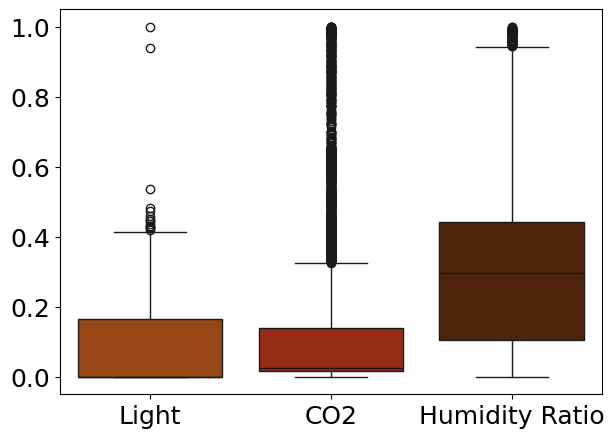

In [4465]:
plot_outliers_boxplot({'Light': '#ad4000', 'CO2': '#ad1d00', 'Humidity Ratio': '#582100'})

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Handling Outliers</li></ul></font>

In [4466]:
preprocess_data['Light'] = handlingOutliers(preprocess_data['Light'])
preprocess_data['CO2'] = handlingOutliers(preprocess_data['CO2'])
preprocess_data['Humidity Ratio'] = handlingOutliers(preprocess_data['Humidity Ratio'])

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>After</li></ul></font>

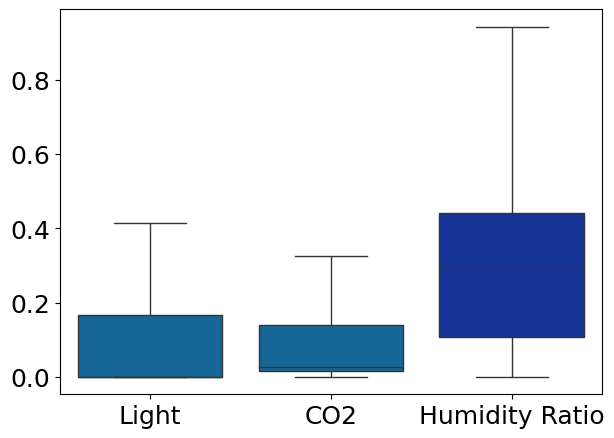

In [4467]:
plot_outliers_boxplot({'Light': '#006dad', 'CO2': '#006dad', 'Humidity Ratio': '#0028ad'})